In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from  matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('/content/income.csv')
df.head()

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Text(0, 0.5, 'Income($)')

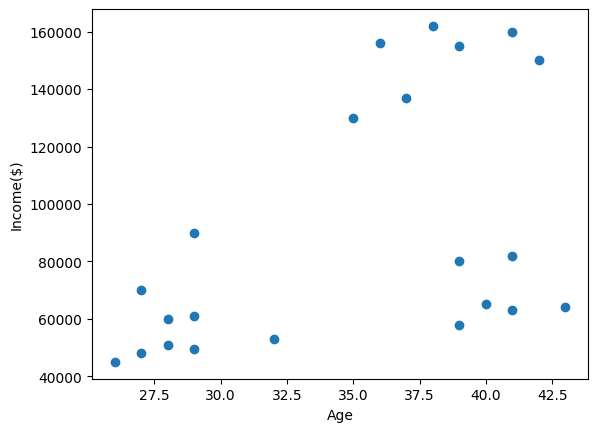

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km=KMeans(n_clusters=3)
y=km.fit_predict(df[['Age','Income($)']])
y

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['clusters']=y
df.head()

Name  Age  Income($)  clusters
0      Rob   27      70000         0
1  Michael   29      90000         0
2    Mohan   29      61000         2
3   Ismail   28      60000         2
4     Kory   42     150000         1

Text(0, 0.5, 'Income($)')

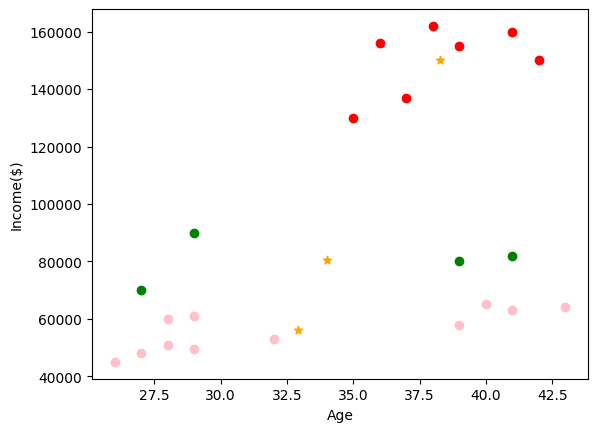

In [ ]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])


In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])


In [ ]:
df.head()

Name       Age  Income($)  clusters
0      Rob  0.058824   0.213675         0
1  Michael  0.176471   0.384615         0
2    Mohan  0.176471   0.136752         2
3   Ismail  0.117647   0.128205         2
4     Kory  0.941176   0.897436         1

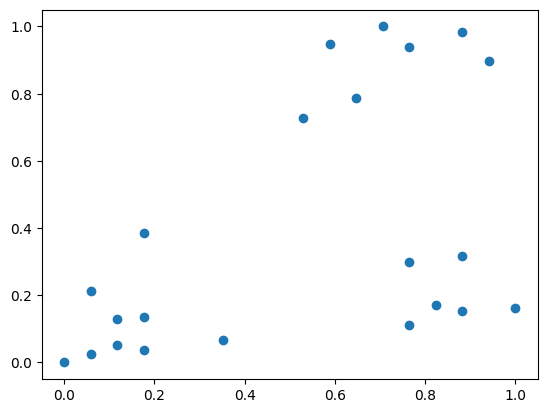

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km=KMeans(n_clusters=3)
y=km.fit_predict(df[['Age','Income($)']])
y

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['clusters']=y

In [ ]:
df.head()

Name       Age  Income($)  clusters
0      Rob  0.058824   0.213675         1
1  Michael  0.176471   0.384615         1
2    Mohan  0.176471   0.136752         1
3   Ismail  0.117647   0.128205         1
4     Kory  0.941176   0.897436         0

In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

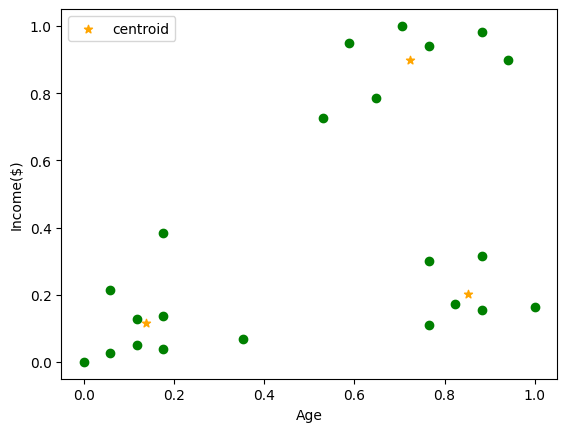

In [ ]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

elbow method


In [ ]:
sse=[]
k_ra=range(1,10)
for k in k_ra:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

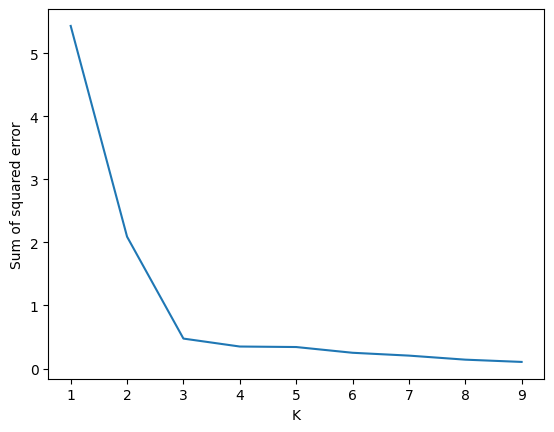

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_ra,sse)
